# Importing 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/ECC/Career Foundry/Anaconda Python CF Exercises'
ords_prods_merged = pd.read_pickle(r'/Users/ECC/Career Foundry/Anaconda Python CF Exercises/02 Data/Prepared Data/ords_prods_merged_21_June.pkl')

In [3]:
ords_prods_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,prices,Busiest day,Busiest_days,Busiest_period_of_day,max_order,loyalty_flag,mean_spending,spending_flag,median_order_days,median_flag
0,2539329,1,1,2,8,NaN,196,1,0,both,...,9.0,Regularly busy,Regular days,Average orders,10,New customer,14.0,High spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,both,...,9.0,Regularly busy,Slowest days,Average orders,10,New customer,14.0,High spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,both,...,9.0,Regularly busy,Slowest days,Most orders,10,New customer,14.0,High spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,both,...,9.0,Least busy,Slowest days,Average orders,10,New customer,14.0,High spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196,1,1,both,...,9.0,Least busy,Slowest days,Most orders,10,New customer,14.0,High spender,20.5,Non-frequent customer


In [4]:
## Looks good.

# Creating Bar Charts

<Axes: >

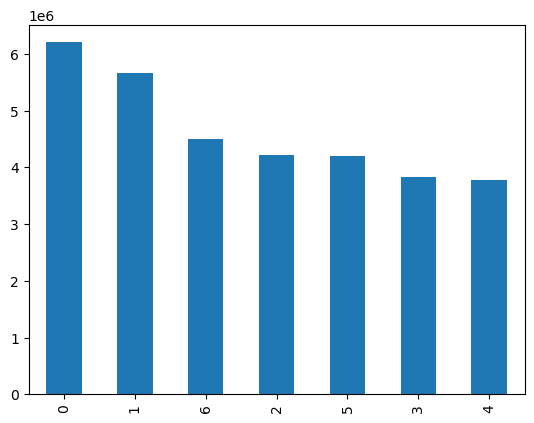

In [5]:
ords_prods_merged['orders_day_of_week'].value_counts().plot.bar()

<Axes: >

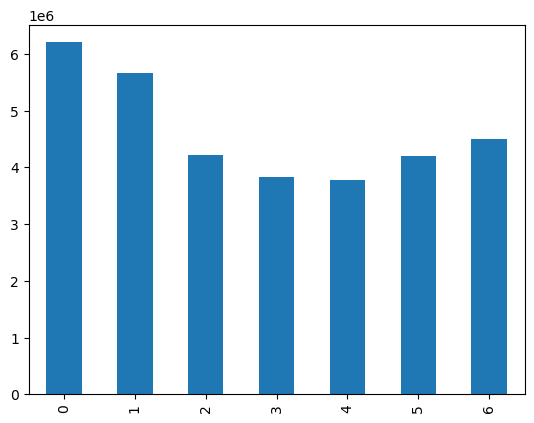

In [6]:
## Sorting with sort_index()
ords_prods_merged['orders_day_of_week'].value_counts().sort_index().plot.bar()

# Exporting Charts

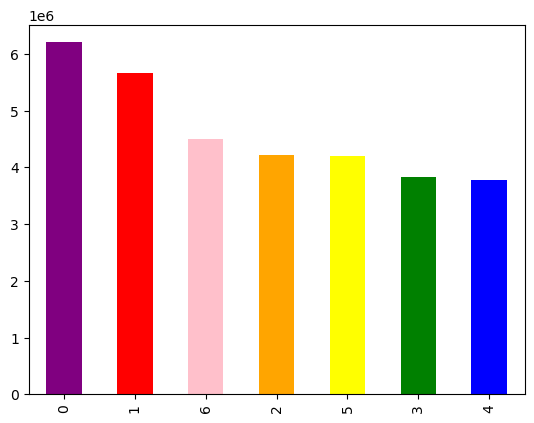

In [8]:
bar = ords_prods_merged['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [10]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_orders_dow.png'))

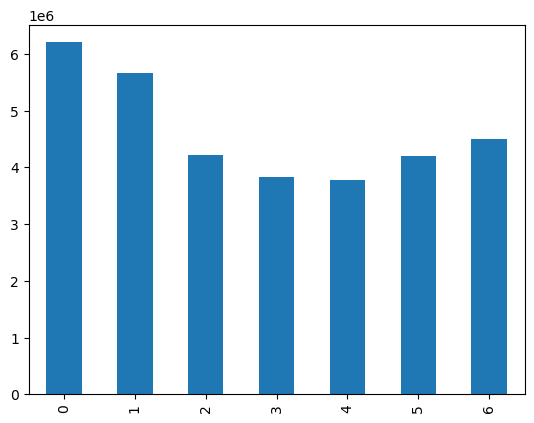

In [11]:
## Saved, although the coloring is not ideal.
bar = ords_prods_merged['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [12]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_orders_dow2.png'))

In [13]:
## Saved as generic blue, with days in order.

# Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

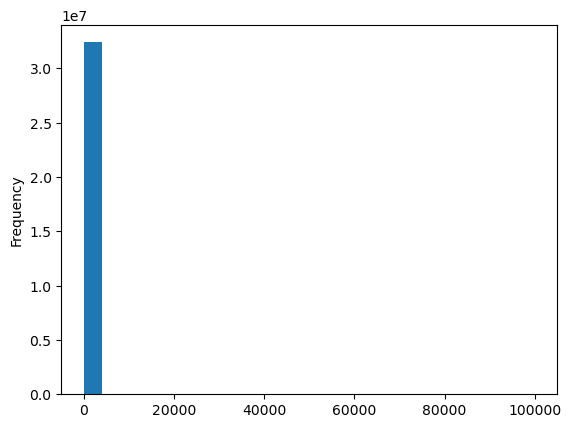

In [14]:
ords_prods_merged['prices'].plot.hist(bins = 25)

In [15]:
## Checking data
ords_prods_merged['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [16]:
ords_prods_merged['prices'].mean()

11.980225638383454

In [17]:
ords_prods_merged['prices'].median()

7.4

In [18]:
ords_prods_merged['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

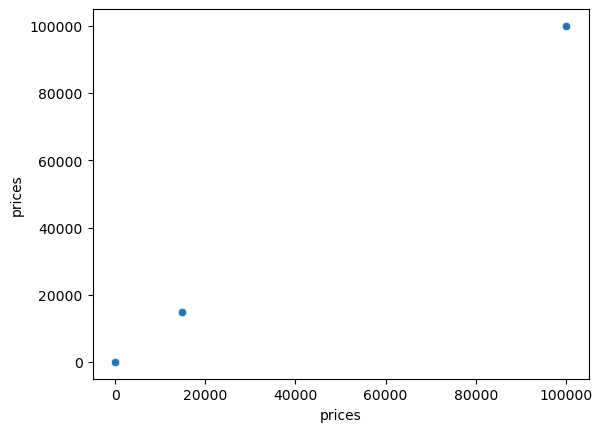

In [20]:
## Now in a scatterplot. 99,999 is an extreme outlier; using a scatterplot could clarify this.

sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merged)

In [22]:
## Checking for outliers and adjusting.

ords_prods_merged.loc[ords_prods_merged['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,prices,Busiest day,Busiest_days,Busiest_period_of_day,max_order,loyalty_flag,mean_spending,spending_flag,median_order_days,median_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,both,...,14900.0,Regularly busy,Regular days,Most orders,40,Regular customer,14900.0,High spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,both,...,14900.0,Regularly busy,Regular days,Average orders,40,Regular customer,14900.0,High spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,both,...,14900.0,Regularly busy,Regular days,Average orders,4,New customer,14900.0,High spender,12.0,NaN
10030348,892534,135,3,0,8,12.0,21553,3,1,both,...,14900.0,Busiest day,Busiest days,Average orders,4,New customer,14900.0,High spender,12.0,NaN
10030349,229704,342,8,1,19,30.0,21553,9,0,both,...,14900.0,Regularly busy,Busiest days,Average orders,16,Regular customer,14900.0,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,both,...,99999.0,Busiest day,Busiest days,Average orders,39,Regular customer,99999.0,High spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,both,...,99999.0,Busiest day,Busiest days,Average orders,39,Regular customer,99999.0,High spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,both,...,99999.0,Regularly busy,Slowest days,Most orders,15,Regular customer,99999.0,High spender,5.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,both,...,99999.0,Regularly busy,Slowest days,Average orders,12,Regular customer,99999.0,High spender,12.0,Regular customer


In [23]:
## Marking these values as NaN to clear up hist and scatter.

ords_prods_merged.loc[ords_prods_merged['prices'] >100, 'prices'] = np.nan

In [24]:
ords_prods_merged['prices'].max()

25.0

<Axes: ylabel='Frequency'>

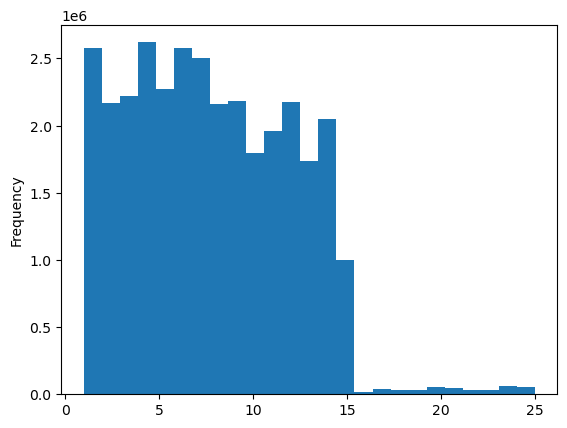

In [25]:
## Running Histogram and Scatterplot again with corrected data.
ords_prods_merged['prices'].plot.hist(bins = 25)

<Axes: ylabel='Frequency'>

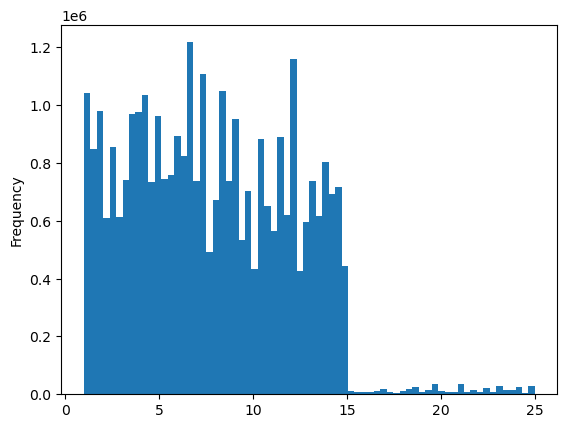

In [26]:
ords_prods_merged['prices'].plot.hist(bins = 70)

In [27]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'hist_ords_pricing.png'))

<Axes: xlabel='prices', ylabel='prices'>

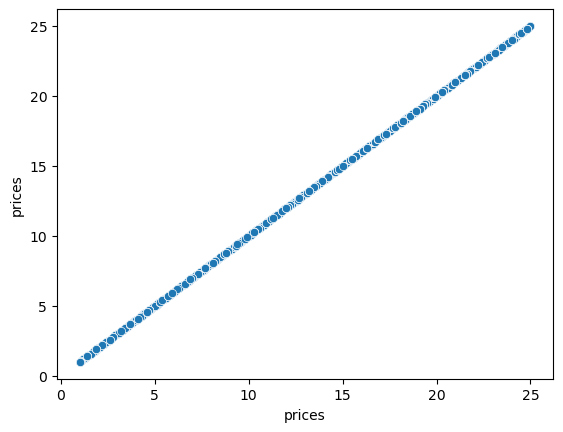

In [28]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merged)

In [29]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'scat_ords_pricing.png'))

# Creating Line Charts
## Sampling data

In [31]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merged)) <= 0.7

In [32]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [33]:
## Checks out.

In [35]:
## 'big' stores 70% of the data
big = ords_prods_merged[dev]

In [36]:
## small stores 30% of the data
small = ords_prods_merged[~dev]

In [38]:
len(ords_prods_merged)

32404859

In [39]:
len(big) + len(small)

32404859

In [40]:
## Matching values.

In [41]:
df_2 = small[['orders_day_of_week','prices']]

In [42]:
df_2.head()

,orders_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,1,9.0


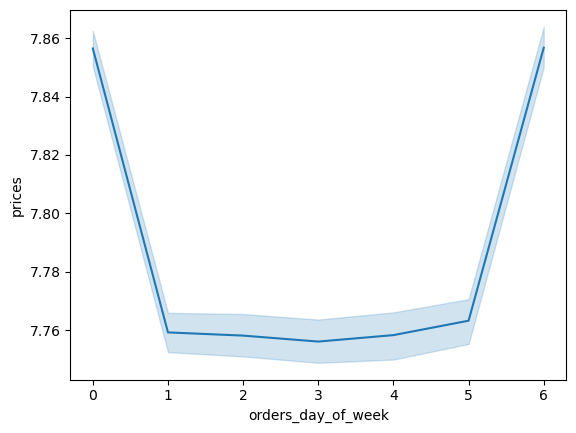

In [43]:
## Below, the sns.lineplot() function is being used to create the line chart and save it to a new object, line. 
## The arguments it needs are the dataframe (df_2), 
## the column on the x-axis (“orders_day_of_week”), 
## and the column on the y-axis (“prices”).

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [44]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_samp_ords_pricing.png'))

## Testing the large dataset. 

In [45]:
df_4 = ords_prods_merged[['orders_day_of_week','prices']]

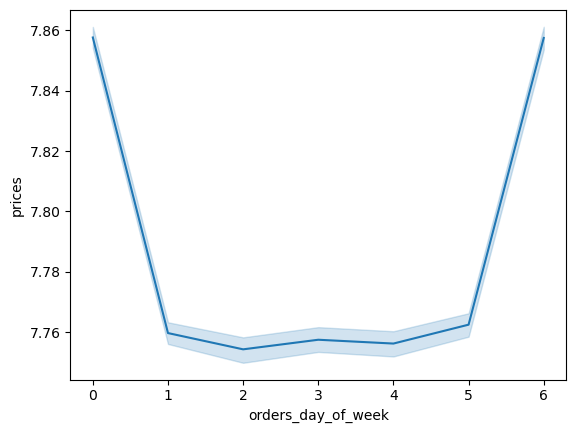

In [46]:
line = sns.lineplot(data = df_4, x = 'orders_day_of_week',y = 'prices')

## Time started: 12:03 Thursday, 22

In [47]:
ords_prods_merged['orders_day_of_week'].value_counts().plot.bar()